
<a id='cass-koopmans'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Cass-Koopmans Optimal Growth Model

## Contents

- [Cass-Koopmans Optimal Growth Model](#Cass-Koopmans-Optimal-Growth-Model)  
  - [Overview](#Overview)  
  - [The Growth Model](#The-Growth-Model)  
  - [Competitive Equilibrium](#Competitive-Equilibrium)  

**Coauthor: Brandon Kaplowitz**

## Overview

This lecture describes a model that Tjalling Koopmans [[Koo65]](https://lectures.quantecon.org/py/zreferences.html#koopmans)
and David Cass [[Cas65]](https://lectures.quantecon.org/py/zreferences.html#cass) used to analyze optimal growth

The model can be viewed as an extension of the model of Robert Solow
described in [an earlier lecture](https://lectures.quantecon.org/py/python_oop.html)
but adapted to make the savings rate the outcome of an optimal choice

(Solow assumed a constant saving rate determined outside the model)

We describe two versions of the model to illustrate what is in fact a
more general connection between a **planned economy** and an economy
organized as a **competitive equilibrium**

The lecture uses important ideas including

- Hicks-Arrow prices named after John R. Hicks and Kenneth Arrow  
- A max-min problem for solving a planning problem  
- A **shooting algorithm** for solving difference equations subject
  to initial and terminal conditions  
- A connection between some Lagrange multipliers in the max-min
  problem and the Hicks-Arrow prices  
- A **Big** $ K $ **, little** $ k $ trick widely used in
  macroeconomic dynamics  


> - We shall encounter this trick in [this lecture](https://lectures.quantecon.org/py/rational_expectations.html#)
  and also in [this lecture](https://lectures.quantecon.org/py/dyn_stack.html#)  



- An application of a **guess and verify** method for solving a
  system of difference equations  
- The intimate connection between the cases for the optimality of two
  competing visions of good ways to organize an economy, namely:  


> - **socialism** in which a central planner commands the
  allocation of resources, and  
- **capitalism** (also known as **a free markets economy**) in
  which competitive equilibrium **prices** induce individual
  consumers and producers to choose a socially optimal allocation
  as an unintended consequence of their completely selfish
  decisions  



- A **turnpike** property that describes optimal paths for
  long-but-finite horizon economies  
- A non-stochastic version of a theory of the **term structure of
  interest rates**  


Let’s start with some imports

In [1]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The Growth Model

Time is discrete and takes values $ t = 0, 1 , \ldots, T $

(We leave open the possibility that $ T = + \infty $, but that
will require special care in interpreting and using a **terminal
condition** on $ K_t $ at $ t = T+1 $ to be described
below)

A single good can either be consumed or invested in physical capital

The consumption good is not durable and depreciates completely if not
consumed immediately

The capital good is durable but depreciates each period at rate
$ \delta \in (0,1) $

We let $ C_t $ be a nondurable consumption good at time t

Let $ K_t $ be the stock of physical capital at time t

Let $ \vec{C} $ = $ \{C_0,\dots, C_T\} $ and
$ \vec{K} $ = $ \{K_1,\dots,K_{T+1}\} $

A representative household is endowed with one unit of labor at each
$ t $ and likes the consumption good at each $ t $

The representative household inelastically supplies a single unit of
labor $ N_t $ at each $ t $, so that
$ N_t =1 \text{ for all } t \in [0,T] $

The representative household has preferences over consumption bundles
ordered by the utility functional:


<a id='equation-utility-functional'></a>
$$
U(\vec{C}) = \sum_{t=0}^{T} \beta^t \frac{C_t^{1-\gamma}}{1-\gamma} \tag{1}
$$

where $ \beta \in (0,1) $ is a discount factor and $ \gamma >0 $
governs the curvature of the one-period utility function

Note that


<a id='equation-utility-oneperiod'></a>
$$
u(C_t) = \beta^t \frac{C_t^{1-\gamma}}{1-\gamma} \tag{2}
$$

satisfies $ u'>0,u''<0 $

$ u' > 0 $ asserts the consumer prefers more to less

$ u''< 0 $ asserts that marginal utility declines with increases
in $ C_t $

We assume that $ K_0 > 0 $ is a given exogenous level of initial
capital

There is an economy-wide production function


<a id='equation-production-function'></a>
$$
F(K_t,N_t) = A K_t^{\alpha}N_t^{1-\alpha} \tag{3}
$$

with $ 0 < \alpha<1 $, $ A > 0 $

A feasible allocation $ \vec C, \vec K $ satisfies


<a id='equation-allocation'></a>
$$
C_t + K_{t+1} = F(K_t,N_t) + (1-\delta) K_t, \quad \text{for all } t \in [0, T] \tag{4}
$$

where $ \delta \in (0,1) $ is a depreciation rate of capital

### Planning problem

A planner chooses an allocation $ \{\vec{C},\vec{K}\} $ to
maximize [(1)](#equation-utility-functional) subject to [(4)](#equation-allocation)

Let $ \vec{\mu}=\{\mu_0,\dots,\mu_T\} $ be a sequence of
nonnegative **Lagrange multipliers**

To find an optimal allocation, we form a Lagrangian

$$
\mathcal{L}(\vec{C},\vec{K},\vec{\mu}) =
\sum_{t=0}^T \beta^t\left\{ u(C_t)+ \mu_t
\left(F(K_t,1) + (1-\delta) K_t- C_t - K_{t+1} \right)\right\}
$$

and then solve the following max-min problem:


<a id='equation-max-min-prob'></a>
$$
\max_{\vec{C},\vec{K}}\min_{\vec{\mu}}\mathcal{L}(\vec{C},\vec{K},\vec{\mu}) \tag{5}
$$

#### Useful properties of linearly homogeneous production function

The following technicalities will help us

Notice that

$$
F(K_t,N_t) = A K_t^\alpha N_t^{1-\alpha} = N_t A\left(\frac{K_t}{N_t}\right)^\alpha
$$

Define the **output per-capita production function**

$$
f(\frac{K_t}{N_t}) = A\left(\frac{K_t}{N_t}\right)^\alpha
$$

whose argument is **capital per-capita**

Evidently,

$$
F(K_t,N_t)=N_t f \left( \frac{K_t}{N_t} \right)
$$

Now for some useful calculations

First


<a id='equation-useful-calc1'></a>
$$
\begin{align}
\frac{\partial F}{\partial K}
&=
\frac{\partial N_t f\left( \frac{K_t}{N_t}\right)}{\partial K_t}
\\ &=
N_t f'\left(\frac{K_t}{N_t}\right)\frac{1}{N_t} \quad \text{(Chain rule)}
\\ &=
f'\left.\left(\frac{K_t}{N_t}\right)\right|_{N_t=1}
\\ &= f'(K_t)
\end{align} \tag{6}
$$

Also

$$
\begin{align}
\frac{\partial F}{\partial N}
&=
\frac{\partial N_t f\left( \frac{K_t}{N_t}\right)}{\partial N_t} \tag{Product rule}
\\ &=
f\left(\frac{K_t}{N_t}\right){+} N_t f'\left(\frac{K_t}{N_t}\right) \frac{-K_t}{N_t^2} \tag{Chain rule}
\\ &=
f\left(\frac{K_t}{N_t}\right){-}\frac{K_t}{N_t}f'\left.\left(\frac{K_t}{N_t}\right)\right|_{N_t=1}
\\ &=
f(K_t)
\end{align}
$$

#### Back to solving the problem

To solve the Lagrangian extremization problem, we compute first
derivatives of the Lagrangian and set them equal to 0

- **Note:** Our objective function and constraints satisfy
  conditions that work to assure that required second-order
  conditions are satisfied at an allocation that satisfies the
  first-order conditions that we are about to compute  


Here are the **first order necessary conditions** for extremization
(i.e., maximization with respect to $ \vec C, \vec K $,
minimization with respect to $ \vec \mu $):


<a id='equation-constraint1'></a>
$$
C_t: \qquad u'(C_t)-\mu_t=0 \qquad \text{for all} \quad t= 0,1,\dots,T \\ \tag{7}
$$


<a id='equation-constraint2'></a>
$$
K_t: \qquad \beta \mu_t\left[(1-\delta)+f'(K_t)\right] - \mu_{t-1}=0 \qquad \text{for all } \quad t=1,2,\dots,T+1 \\ \tag{8}
$$


<a id='equation-constraint3'></a>
$$
\mu_t:\qquad F(K_t,1)+ (1-\delta) K_t  - C_t - K_{t+1}=0 \qquad \text{for all } \quad t=0,1,\dots,T \\ \tag{9}
$$


<a id='equation-constraint4'></a>
$$
K_{t+1}: \qquad -\mu_T \leq 0, \ <0 \text{ if } K_{T+1}=0; \ =0 \text{ if } K_{T+1}>0  \\ \tag{10}
$$

Note that in [(8)](#equation-constraint2) we plugged in for
$ \frac{\partial F}{\partial K} $ using our formula [(6)](#equation-useful-calc1)
above

Because $ N_t = 1 $ for $ t = 1, \ldots, T $, need not
differentiate with respect to those arguments

Note that [(9)](#equation-constraint3) comes from the occurrence
of $ K_t $ in both the period $ t $ and period $ t-1 $
feasibility constraints

[(10)](#equation-constraint4) comes from differentiating with respect
to $ K_{T+1} $ in the last period and applying the following
condition called a **Karush-Kuhn-Tucker condition** (KKT):


<a id='equation-kkt'></a>
$$
\mu_T K_{T+1}=0 \tag{11}
$$

See [Karush-Kuhn-Tucker conditions](en.wikipedia.org/wiki/Karush-Kuhn-Tucker_conditions)

Combining [(7)](#equation-constraint1) and [(8)](#equation-constraint2) gives

$$
u'\left(C_t\right)\left[(1-\delta)+f'\left(K_t\right)\right]-u'\left(C_{t-1}\right)=0
\quad \text{ for all } t=1,2,\dots, T+1
$$

Rewriting gives


<a id='equation-l12'></a>
$$
u'\left(C_{t+1}\right)\left[(1-\delta)+f'\left(K_{t+1}\right)\right]=
u'\left(C_{t}\right) \quad \text{ for all } t=0,1,\dots, T \tag{12}
$$

Taking the inverse of the utility function on both sides of the above
equation gives

$$
C_{t+1} =u'^{-1}\left(\left(\frac{\beta}{u'(C_t)}[f'(K_{t+1}) +(1-\delta)]\right)^{-1}\right)
$$

or using our utility function [(2)](#equation-utility-oneperiod)

$$
\begin{align} C_{t+1} =\left(\beta C_t^{\gamma}[f'(K_{t+1}) +
(1-\delta)]\right)^{1/\gamma} \notag\\= C_t\left(\beta [f'(K_{t+1}) +
(1-\delta)]\right)^{1/\gamma} \end{align}
$$

The above first-order condition for consumption is called an **Euler
equation**

It tells us how consumption in adjacent periods are optimally related
to each other and to capital next period

We now use some of the the equations above to calculate some
variables and functions that we’ll soon use to solve the planning
problem with Python

In [2]:
@njit
def u(c, γ):
    '''
    Utility function
    ASIDE: If you have a utility function that is hard to solve by hand
    you can use automatic or symbolic  differentiation
    See https://github.com/HIPS/autograd
    '''
    if γ == 1:
        ## If γ = 1 we can show via L'hopital's Rule that the utility becomes log
        return np.log(c)
    else:
        return c**(1 - γ) / (1 - γ)

@njit
def u_prime(c, γ):
    '''Derivative of utility'''
    if γ == 1:
        return 1 / c
    else:
        return c**(-γ)

@njit
def u_prime_inv(c, γ):
    '''Inverse utility'''
    if γ == 1:
        return c
    else:
        return c**(-1 / γ)

@njit
def f(A, k, α):
    '''Production function'''
    return A * k**α

@njit
def f_prime(A, k, α):
    '''Derivative of production function'''
    return α * A * k**(α - 1)

@njit
def f_prime_inv(A, k, α):
    return (k / (A * α))**(1 / (α - 1))

### Shooting Method

We shall use a **shooting method** to compute an optimal allocation
$ \vec C, \vec K $ and an associated Lagrange multiplier sequence
$ \vec \mu $

The first-order necessary conditions for the planning problem,
namely, equations [(7)](#equation-constraint1), [(8)](#equation-constraint2), and
[(9)](#equation-constraint3), form a system of **difference equations** with
two boundary conditions:

- $ K_0 $ is a given **initial condition** for capital  
- $ K_{T+1} =0 $ is a **terminal condition** for capital that we
  deduced from the first-order necessary condition for $ K_{T+1} $
  the KKT condition [(11)](#equation-kkt)  


We have no initial condition for the Lagrange multiplier
$ \mu_0 $

If we did, solving for the allocation would be simple:

- Given $ \mu_0 $ and $ k_0 $, we could compute $c_0 $ from
  equation [(7)](#equation-constraint1) and then $ k_1 $ from equation
  [(9)](#equation-constraint3) and $ \mu_1 $ from equation
  [(8)](#equation-constraint2)  
- We could then iterate on to compute the remaining elements of
  $ \vec C, \vec K, \vec \mu $  


But we don’t have an initial condition for $ \mu_0 $, so this
won’t work

But a simple modification called the **shooting algorithm** will
work

The **shooting algorithm** is an instance of a **guess and verify**
algorithm

It proceeds as follows:

- Guess a value for the initial Lagrange multiplier $ \mu_0 $  
- Apply the **simple algorithm** described above  
- Compute the implied value of $ k_{T+1} $ and check whether it
  equals zero  
- If the implied $ K_{T+1} =0 $, we have solved the problem  
- If $ K_{T+1} > 0 $, lower $ \mu_0 $ and try again  
- If $ K_{T+1} < 0 $, raise $ \mu_0 $ and try again  


The following Python code implements the shooting algorithm for the
planning problem

We make a slight modification starting with a guess of
$ c_0 $ but since $ c_0 $ is a function of $ \mu_0 $
there is no difference to the procedure above

We’ll apply it with an initial guess that will turn out not to be
perfect, as we’ll soon see

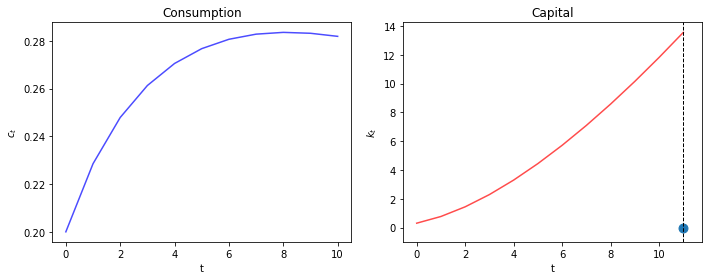

In [3]:
# Parameters
γ = 2
δ = 0.02
β = 0.95
α = 0.33
A = 1

# Initial guesses
T = 10
c = np.zeros(T+1)  # T periods of consumption initialized to 0
k = np.zeros(T+2)  # T periods of capital initialized to 0 (T+2 to include t+1 variable as well)
k[0] = 0.3  # Initial k
c[0] = 0.2  # Guess of c_0

@njit
def shooting_method(c, # Initial consumption
                    k,   # Initial capital
                    γ,   # Coefficient of relative risk aversion
                    δ,   # Depreciation rate on capital# Depreciation rate
                    β,   # Discount factor
                    α,   # Return to capital per capita
                    A):  # Technology

    T = len(c) - 1

    for t in range(T):
        k[t+1] = f(A=A, k=k[t], α=α) + (1 - δ) * k[t] - c[t]  # Equation 1 with inequality
        if k[t+1] < 0:   # Ensure nonnegativity
            k[t+1] = 0

      # Equation 2: We keep in the general form to show how we would
      # solve if we didn't want to do any simplification

        if β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ)) == np.inf:
            # This only occurs if k[t+1] is 0, in which case, we won't
            # produce anything next period, so consumption will have to be 0
            c[t+1] = 0
        else:
            c[t+1] = u_prime_inv(u_prime(c=c[t], γ=γ) / (β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ))), γ=γ)

    # Terminal condition calculation
    k[T+1] = f(A=A, k=k[T], α=α) + (1 - δ) * k[T] - c[T]

    return c, k

paths = shooting_method(c, k, γ, δ, β, α, A)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

for path, color, title, y, ax in zip(paths, colors, titles, ylabels, axes):
    ax.plot(path, c=color, alpha=0.7)
    ax.set(title=title, ylabel=y, xlabel='t')

ax.scatter(T+1, 0, s=80)
ax.axvline(T+1, color='k', ls='--', lw=1)

plt.tight_layout()
plt.show()

Evidently our initial guess for $ \mu_0 $ is too high and makes
initial consumption is too low

We know this because we miss our $ K_{T+1}=0 $ target on the high
side

Now we automate things with a search-for-a-good $ \mu_0 $
algorithm that stops when we hit the target $ K_{t+1} = 0 $

The search procedure is to use a **bisection method**

Here is how we apply the bisection method

We take an initial guess for $ C_0 $ (we can eliminate
$ \mu_0 $ because $ C_0 $ is an exact function of
$ \mu_0 $)

We know that the lowest $ C_0 $ can ever be is $ 0 $ and the
largest it can be is initial output $ f(K_0) $

We take a $ C_0 $ guess and shoot forward to $ T+1 $

If the $ K_{T+1}>0 $, let it be our new **lower** bound
on $ C_0 $

If $ K_{T+1}<0 $, let it be our new **upper** bound

Make a new guess for $ C_0 $ exactly halfway between our new
upper and lower bounds

Shoot forward again and iterate the procedure

When $ K_{T+1} $ gets close enough to 0 (within some error
tolerance bounds), stop and declare victory

In [4]:
@njit
def bisection_method(c,
                     k,
                     γ,              # Coefficient of relative risk aversion
                     δ,              # Depreciation rate on capital# Depreciation rate
                     β,              # Discount factor
                     α,              # Return to capital per capita
                     A,              # Technology
                     tol=1e-4,
                     max_iter=1e4,
                     terminal=0):    # Value we are shooting towards

    T = len(c) - 1
    i = 1                            # Initial iteration
    c_high = f(k=k[0], α=α, A=A)     # Initial high value of c
    c_low = 0                        # Initial low value of c

    path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)

    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) and i < max_iter:

        if path_k[T+1] - terminal > tol:
            # If assets are too high the c[0] we chose is now a lower bound on possible values of c[0]
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            # If assets fell too quickly, the c[0] we chose is now an upper bound on possible values of c[0]
            c_high=c[0]
        elif path_k[T] == terminal:
            # If assets fell  too quickly, the c[0] we chose is now an upper bound on possible values of c[0]
            c_high=c[0]

        c[0] = (c_high + c_low) / 2  # This is the bisection part
        path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)
        i += 1

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Converged successfully on iteration', i-1)
    else:
        print('Failed to converge and hit maximum iteration')

    μ = u_prime(c=path_c, γ=γ)
    return path_c, path_k, μ

Now we can plot

Converged successfully on iteration 18


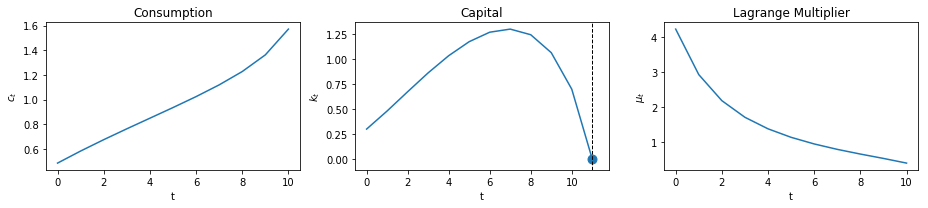

In [5]:
T = 10
c = np.zeros(T+1) # T periods of consumption initialized to 0
k = np.zeros(T+2) # T periods of capital initialized to 0. T+2 to include t+1 variable as well.

k[0] = 0.3 # initial k
c[0] = 0.3 # our guess of c_0

paths = bisection_method(c, k, γ, δ, β, α, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of capital
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

### Setting $ K_0 $ equal to steady state $ K $

If $ T \rightarrow +\infty $, the optimal allocation converges to
steady state values of $ C_t $ and $ K_t $

It is instructive to compute these and then to set $ K_0 $ equal
to its steady state value

In a steady state $ K_{t+1} = K_t=\bar{K} $ for all very
large $ t $ the feasibility constraint [(4)](#equation-allocation) is


<a id='equation-feasibility-constraint'></a>
$$
f(\bar{K})-\delta \bar{K} = \bar{C} \tag{13}
$$

Substituting $ K_t = \bar K $ and $ C_t=\bar C $ for
all $ t $ into [(12)](#equation-l12) gives

$$
1=\beta \frac{u'(\bar{C})}{u'(\bar{C})}[f'(\bar{K})+(1-\delta)]
$$

Defining $ \beta = \frac{1}{1+\rho} $, and cancelling gives

$$
1+\rho = 1[f'(\bar{K}) + (1-\delta)]
$$

Simplifying gives

$$
f'(\bar{K}) = \rho +\delta
$$

and

$$
\bar{K} = f'^{-1}(\rho+\delta)
$$

Using our production function [(3)](#equation-production-function) gives

$$
\alpha \bar{K}^{\alpha-1} = \rho + \delta
$$

Finally, using $ \alpha= .33 $,
$ \rho = 1/\beta-1 =1/(19/20)-1 = 20/19-19/19 = 1/19 $, $ \delta = 1/50 $,
we get

$$
\bar{K} = \left(\frac{\frac{33}{100}}{\frac{1}{50}+\frac{1}{19}}\right)^{\frac{67}{100}} \approx 9.57583
$$

Let’s verify this with Python and then use this steady state
$ \bar K $ as our initial capital stock $ K_0 $

In [6]:
ρ = 1 / β - 1
k_ss = f_prime_inv(k=ρ+δ, A=A, α=α)

print(f'Steady state for capital is: {k_ss}')

Steady state for capital is: 9.57583816331462


Now we plot

Converged successfully on iteration 39


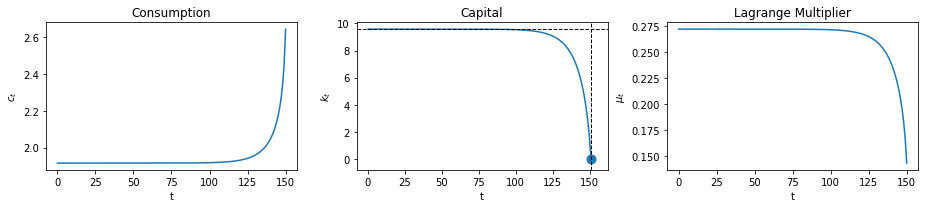

In [7]:
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss  # Start at steady state
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Evidently in this economy with a large value of
$ T $, $ K_t $ stays near its initial value at the until the
end of time approaches closely

Evidently, the planner likes the steady state capital stock and wants
to stay near there for a long time

Let’s see what happens when we push the initial
$ K_0 $ below $ \bar K $

Converged successfully on iteration 39


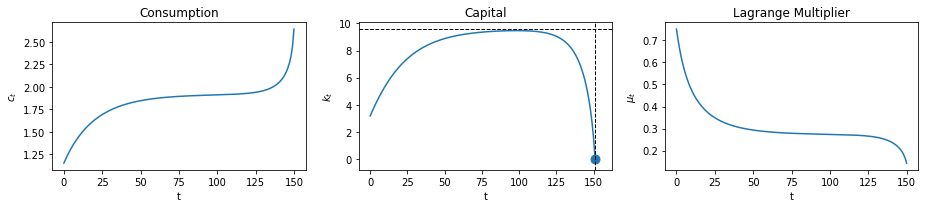

In [8]:
k_init = k_ss / 3   # Below our steady state
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_init
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Notice how the planner pushes capital toward the steady state, stays
near there for a while, then pushes $ K_t $ toward the terminal
value $ K_{T+1} =0 $ as $ t $ gets close to $ T $

The following graphs compare outcomes as we vary $ T $

Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25
Converged successfully on iteration 22


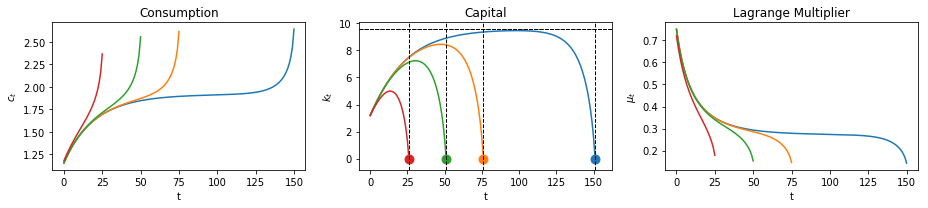

In [9]:
T_list = (150, 75, 50, 25)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_paths(paths, ss=k_ss, axes=axes)

The following calculation shows that when we set $ T $ very large
the planner makes the capital stock spend most of its time close to
its steady state value

Failed to converge and hit maximum iteration
Converged successfully on iteration 39
Converged successfully on iteration 25
Converged successfully on iteration 22


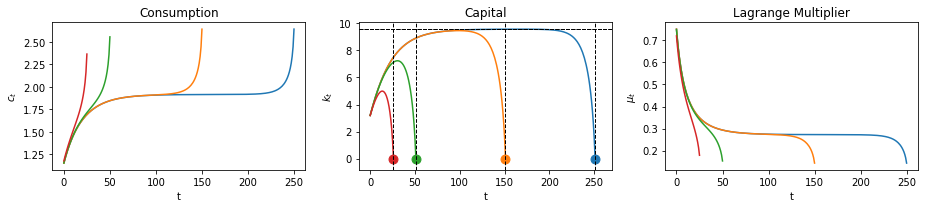

In [10]:
T_list = (250, 150, 50, 25)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_paths(paths, ss=k_ss, axes=axes)

The different colors in the above graphs are tied to outcomes with
different horizons $ T $

Notice that as the horizon increases, the planner puts $ K_t $
closer to the steady state value $ \bar K $ for longer

This pattern reflects a **turnpike** property of the steady state

A rule of thumb for the planner is

- for whatever $ K_0 $ you start with, push $ K_t $ toward
  the stady state and stay there for as long as you can  


In loose language: head for the turnpick and stay near it for as long as you can

As we drive $ T $ toward $ +\infty $, the planner
keeps $ K_t $ very close to its steady state for all dates after
some transition toward the steady state

The planner makes the saving rate $ \frac{f(K_t) - C_t}{f(K_t)} $
vary over time

Let’s calculate it

Failed to converge and hit maximum iteration


Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25


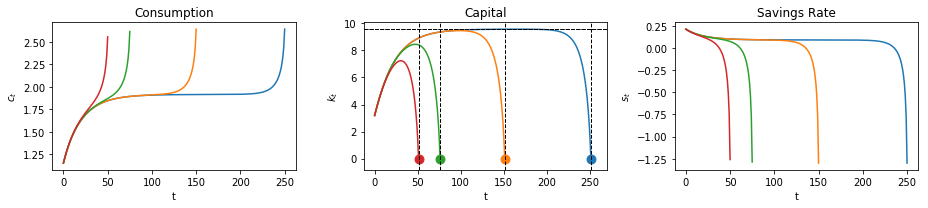

In [11]:
@njit
def S(K):
    '''Aggregate savings'''
    T = len(K) - 2
    S = np.zeros(T+1)
    for t in range(T+1):
        S[t] = K[t+1] - (1 - δ) * K[t]
    return S

@njit
def s(K):
    '''Savings rate'''
    T = len(K) - 2
    Y = f(A, K, α)
    Y = Y[0:T+1]
    s = S(K) / Y
    return s

def plot_savings(paths, c_ss=None, k_ss=None, s_ss=None, axes=None):

    T = len(paths[0])
    k_star = paths[1]
    savings_path = s(k_star)
    new_paths = (paths[0], paths[1], savings_path)

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$s_t$']
    titles = ['Consumption', 'Capital', 'Savings Rate']

    for path, y, title, ax in zip(new_paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of consumption
    if c_ss is not None:
        axes[0].axhline(c_ss, c='k', ls='--', lw=1)

    # Plot steady state value of capital
    if k_ss is not None:
        axes[1].axhline(k_ss, c='k', ls='--', lw=1)

    # Plot steady state value of savings
    if s_ss is not None:
        axes[2].axhline(s_ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, k_star[-1], s=80)
    plt.tight_layout()

T_list = (250, 150, 75, 50)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_savings(paths, k_ss=k_ss, axes=axes)

### $ T=+\infty $ economy

We now consider an economy in which $ T = +\infty $

The appropriate thing to do is to replace terminal condition
[(10)](#equation-constraint4) with

$$
\lim_{T \rightarrow +\infty} \beta^T u'(C_T) K_T = 0
$$

This condition will be satisfied by a path that converges to an
optimal steady state

We can approximate the optimal path from an arbitrary initial
$ K_0 $ and shooting toward the optimal steady state
$ K $ at a large but finite $ T+1 $

In the following code, we do this for a large $ T $; we shoot
towards the **steady state** and plot consumption, capital and the
savings rate

We know that in the steady state that the saving rate must be fixed
and that $ \bar s= \frac{f(\bar K)-\bar C}{f(\bar K)} $

From [(13)](#equation-feasibility-constraint) the steady state saving rate equals

$$
\bar s =\frac{ \delta \bar{K}}{f(\bar K)}
$$

The steady-state savings level $ \bar S = \bar s f(\bar K) $ is
the amount required to offset capital depreciation each period

We first study optimal capital paths that start below the steady
state

Converged successfully on iteration 35


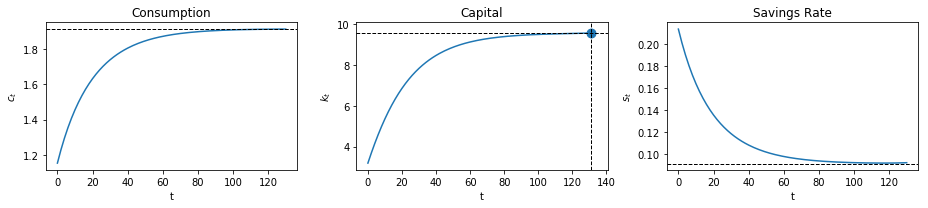

In [12]:
T = 130

# Steady states
S_ss = δ * k_ss
c_ss = f(A, k_ss, α) - S_ss
s_ss = S_ss / f(A, k_ss, α)

c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss / 3         # Start below steady state
paths = bisection_method(c, k, γ, δ, β, α, A, terminal=k_ss)
plot_savings(paths, k_ss=k_ss, s_ss=s_ss, c_ss=c_ss)

Since $ K_0<\bar K $, $ f'(K_0)>\rho +\delta $

The planner choose a positive saving rate above the steady state
level offsetting depreciation that enables us to increase our capital
stock

Note, $ f''(K)<0 $, so as $ K $ rises, $ f'(K) $ declines

The planner slowly lowers the savings rate until reaching a steady
state where $ f'(K)=\rho +\delta $

### Exercise

- Plot the optimal consumption, capital, and savings paths when the
  initial capital level begins at 1.5 times the steady state level
  as we shoot towards the steady state at $ T=130 $  
- Why does the savings rate respond like it does?  

### Solution

Converged successfully on iteration 31


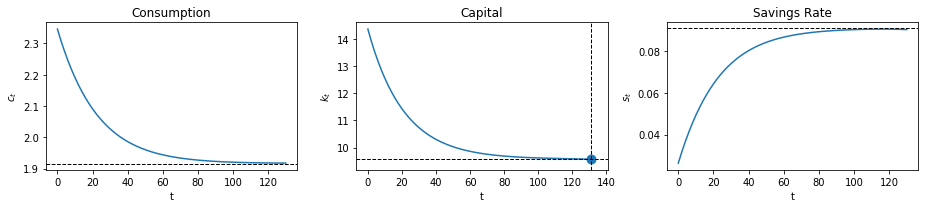

In [13]:
T = 130

c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss * 1.5   # Start above steady state
paths = bisection_method(c, k, γ, δ, β, α, A, terminal=k_ss)
plot_savings(paths, k_ss=k_ss, s_ss=s_ss, c_ss=c_ss)

## Competitive Equilibrium

Next we study a decentralized version of an economy with same
technology and preference structure as our planned economy

But now there is no planner

Market prices adjust to reconcile distinct decisions that are made
separately by a representative household and a representative firm

The technology for producing goods and accumulating capital via
physical investment remains as in our planned economy

There is a representative consumer who has the same preferences over
consumption plans as did the consumer in the planned economy

Instead of being told what to consume and save by a planner, the
household chooses for itself subject to a budget constraint

- At each time $ t $, the household receives wages and rentals
  of capital from a firm – these comprise its **income** at
  time $ t $  
- The consumer decides how much income to allocate to consumption or
  to savings  
- The household can save either by acquiring additional physical
  capital (it trades one for one with time $ t $ consumption)
  or by acquiring claims on consumption at dates other
  than $ t $  
- A utility maximizing household owns all physical capital and labor
  and rents them to the firm  
- The household consumes, supplies labor, and invests in physical
  capital  
- A profit-maximizing representative firm operates the production
  technology  
- The firm rents labor and capital each period from the
  representative household and sells its output each period to the
  household  
- The representative household and the representative firm are both
  **price takers:**  
  - they (correctly) believe that prices are not affected by their
    choices  


**Note:** We are free to think of there being a large number
$ M $ of identical representative consumers and $ M $
identical representative firms

### Firm Problem

At time $ t $ the representative firm hires labor
$ \tilde n_t $ and capital $ \tilde k_t $

The firm’s profits at time $ t $ are

$$
F(\tilde k_t, \tilde n_t)-w_t \tilde n_t -\eta_t \tilde k_t
$$

where $ w_t $ is a wage rate at $ t $ and
and $ \eta_t $ is the rental rate on capital at $ t $

As in the planned economy model

$$
F(\tilde k_t, \tilde n_t) = A \tilde k_t^\alpha \tilde n_t^{1-\alpha}
$$

#### Zero profit conditions

Zero-profits condition for capital and labor are

$$
F_k(\tilde k_t, \tilde n_t) =\eta_t
$$

and


<a id='equation-zero-profits'></a>
$$
F_n(\tilde k_t, \tilde n_t) =w_t \tag{14}
$$

These conditions emerge from a no-arbitrage requirement

To describe this line of reasoning, we begin by applying a theorem of
Euler about linearly homogenous functions

The theorem applies to the Cobb-Douglas production function because
it assumed displays constant returns to scale:

$$
\alpha F(\tilde k_t, \tilde n_t) =  F(\alpha  \tilde k_t, \alpha \tilde n_t)
$$

for $ \alpha \in (0,1) $

Taking the partial derivative
$ \frac{\partial F }{\partial \alpha} $ on both sides of the
above equation gives

$$
F(\tilde k_t,\tilde n_t) =_\text{chain rule} \frac{\partial F}{\partial \tilde k_t}
\tilde k_t + \frac{\partial F}{\partial \tilde  n_t} \tilde n_t
$$

Rewrite the firm’s profits as

$$
\frac{\partial F}{\partial \tilde k_t} \tilde k_t +
\frac{\partial F}{\partial \tilde  n_t} \tilde n_t-w_t \tilde n_t -\eta_t k_t
$$

or

$$
\left(\frac{\partial F}{\partial \tilde k_t}-\eta_t\right) \tilde k_t +
\left(\frac{\partial F}{\partial \tilde  n_t}-w_t\right) \tilde n_t
$$

Because $ F $ is homogeneous of degree $ 1 $, it follows
that $ \frac{\partial F}{\partial \tilde k_t} $ and
$ \frac{\partial F}{\partial \tilde n_t} $ are homogeneous of
degree $ 0 $ and therefore fixed with respect to
$ \tilde k_t $ and $ \tilde n_t $

If $ \frac{\partial F}{\partial \tilde k_t}> \eta_t $, then the
firm makes positive profits on each additional unit of
$ \tilde k_t $, so it will want to make $ \tilde k_t $
arbitrarily large

But setting $ \tilde k_t = + \infty $ is not physically feasible,
so presumably **equilibrium** prices will assume values that present
the firm with no such arbitrage opportunity

A related argument applies if
$ \frac{\partial F}{\partial \tilde n_t}> w_t $

If $ \frac{\partial \tilde k_t}{\partial \tilde k_t}< \eta_t $,
the firm will set $ \tilde k_t $ to zero

Again, **equilibrium** prices won’t incentive the firm to do that.

And so on…

It is convenient to define
$ \vec w_t =\{w_0, \dots,w_T\} $and $ \vec \eta_t = \{\eta_0, \dots, \eta_T\} $

### Household Problem

A representative household lives at $ t=0,1,\dots, T $

At $ t $, the household rents $ 1 $ unit of labor
and $ k_t $ units of capital to a firm and receives income

$$
w_t 1+ \eta_t k_t
$$

At $ t $ the household allocates its income to the following
purchases

$$
\left(c_t + (k_{t+1} -(1-\delta)k_t)\right)
$$

Here $ \left(k_{t+1} -(1-\delta)k_t\right) $ is the household’s
net investment in physical capital and $ \delta \in (0,1) $ is
again a depreciation rate of capital

In period $ t $ is free to purchase more goods to be consumed and
invested in physical capital than its income from supplying capital
and labor to the firm, provided that in some other periods its income
exceeds its purchases

A household’s net excess demand for time $ t $ consumption goods
is the gap

$$
e_t \equiv \left(c_t + (k_{t+1} -(1-\delta)k_t)\right)-(w_t 1 + \eta_t k_t)
$$

Let $ \vec c = \{c_0,\dots,c_T\} $ and let $ \vec k = \{k_1,\dots,k_{T+1}\} $

$ k_0 $ is given to the household

### Market structure for intertemporal trades

There is a **single** grand competitive market in which a
representative household can trade date $ 0 $ goods for goods at
all other dates $ t=1, 2, \ldots, T $

What matters are not **bilateral** trades of the good at one date
$ t $ for the good at another date $ \tilde t \neq t $.

Instead, think of there being **multilateral** and **multitemporal**
trades in which bundles of goods at some dates can be traded for
bundles of goods at some other dates.

There exist **complete markets** in such bundles with associated
market prices

### Market prices

Let $ q^0_t $ be the price of a good at date $ t $ relative
to a good at date $ 0 $

$ \{q^0_t\}_{t=0}^T $ is a vector of **Hicks-Arrow prices**,
named after the 1972 joint economics Nobel prize winners who used
such prices in some of their important work

Evidently,

$$
q^0_t=\frac{\text{# of time 0 goods}}{\text{# of time t goods}}
$$

Because $ q^0_t $ is a **relative price**, the units in terms of
which prices are quoted are arbitrary – we can normalize them
without substantial consequence

If we use the price vector $ \{q^0_t\}_{t=0}^T $ to evaluate a
stream of excess demands $ \{e_t\}_{t=0}^T $ we compute the
**present value** of $ \{e_t\}_{t=0}^T $ to be
$ \sum_{t=0}^T q^0_t e_t $

That the market is **multitemporal** is reflected in the situation
that the household faces a **single** budget constraint

It states that the present value of the household’s net excess
demands must be zero:

$$
\sum_{t=0}^T q^0_t e_t  \leq 0
$$

or

$$
\sum_{t=0}^T q^0_t  \left(c_t + (k_{t+1} -(1-\delta)k_t)-(w_t 1 + \eta_t k_t) \right) \leq 0
$$

### Household problem

The household faces the constrained optimization problem:

$$
\begin {align*}& \max_{\vec c, \vec k}  \sum_{t=0}^T \beta^t u(c_t) \\ \text{subject to} \ \   & \sum_{t=0}^T q_t^0\left(c_t +\left(k_{t+1}-(1-\delta) k_t\right) -w_t -\eta_t k_t\right) \leq 0  \notag \end{align*}
$$

### Definitions

- A **price system** is a sequence
  $ \{q_t^0,\eta_t,w_t\}_{t=0}^T= \{\vec q, \vec \eta, \vec w\} $  
- An **allocation** is a sequence
  $ \{c_t,k_{t+1}, k_{t+1},n_t=1\}_{t=0}^T = \{\vec c, \vec k, \vec n =1\} $  
- A **competitive equilibrium** is a price system and an allocation
  for which  
  - Given the price system, the allocation solves the household’s
    problem  
  - Given the price system, the allocation solves the firm’s
    problem  

### Computing a Competitive Equilibrium

We shall compute a competitive equilibrium using a **guess and
verify** approach

- We shall **guess** equilibrium price sequences
  $ \{\vec q, \vec \eta, \vec w\} $  
- We shall then **verify** that at those prices, the household and
  the firm choose the same allocation  

#### Guess for price system

We have computed an allocation $ \{\vec C, \vec K, \vec 1\} $
that solves the planning problem

We use that allocation to construct our guess for the equilibrium
price system

In particular, we guess that for $ t=0,\dots,T $:


<a id='equation-eq-price'></a>
$$
\lambda q_t^0 = \beta^t u'(K_t) =\beta^t \mu_t \tag{15}
$$


<a id='equation-eq-price2'></a>
$$
w_t = f(K_t) -K_t f'(K_t) \tag{16}
$$


<a id='equation-eq-price3'></a>
$$
\eta_t = f'(K_t) \tag{17}
$$

At these prices, let the capital chosen by the household be


<a id='equation-eq-pr4'></a>
$$
k^*_t(\vec q, \vec w, \vec \eta) , \quad t \geq 0 \tag{18}
$$

and let the allocation chosen by the firm be

$$
\tilde k^*_t(\vec q, \vec  w, \vec \eta), \quad t \geq 0
$$

and so on

If our guess for the equilibrium price system is correct, then it
must occur that


<a id='equation-ge1'></a>
$$
k_t^*  = \tilde k_t^* \\ \tag{19}
$$


<a id='equation-ge2'></a>
$$
1   = \tilde n_t^* \\ \tag{20}
$$

$$
c_t^* + k_{t+1}^* - (1-\delta) k_t^*  = F(\tilde k_t^*, \tilde n_t^*) \\
$$

We shall verify that for $ t=0,\dots,T $ the allocations chosen
by the household and the firm both equal the allocation that solves
the planning problem:


<a id='equation-eq-pl'></a>
$$
k^*_t = \tilde k^*_t=K_t, \tilde n_t=1, c^*_t=C_t \tag{21}
$$

### Verification procedure

Our approach is to stare at first-order necessary conditions for the
optimization problems of the household and the firm

At the price system we have guessed, both sets of first-order
conditions are satisfied at the allocation that solves the planning
problem

### Household’s Lagrangian

To solve the household’s problem, we formulate the appropriate
Lagrangian and pose the max-min problem:

$$
\max_{\vec{c},\vec{k}}\min_{\lambda}\mathcal{L}(\vec{c},\vec{k},\lambda)=
\sum_{t=0}^T \beta^t u(c_t)+ \lambda \left(\sum_{t=0}^T q_t^0\left(c_t -\left(k_{t+1})-(1-\delta)
k_t -w_t\right) -\eta_t k_t\right)\right)
$$

First-order conditions are


<a id='equation-cond1'></a>
$$
c_t: \quad \beta^t u'(c_t)-\lambda q_t^0=0 \quad  t=0,1,\dots,T \tag{22}
$$


<a id='equation-cond2'></a>
$$
k_t: \quad -\lambda q_t^0 \left[(1-\delta)+\eta_t \right]+\lambda q^0_{t-1}=0 \quad  t=1,2,\dots,T+1 \tag{23}
$$


<a id='equation-cond3'></a>
$$
\lambda:  \quad \left(\sum_{t=0}^T q_t^0\left(c_t -\left(k_{t+1}-(1-\delta) k_t\right) -w_t -\eta_t k_t\right)\right) = 0 \tag{24}
$$


<a id='equation-cond4'></a>
$$
k_{T+1}: \quad -\lambda q_0^{T+1} \leq 0, \ <0 \text{ if } K_{T+1}=0; \ =0 \text{ if } K_{T+1}>0 \tag{25}
$$

Now we plug in for our guesses of prices and derive all the FONC of
the planner problem [(7)](#equation-constraint1)-[(10)](#equation-constraint4):

Combining [(22)](#equation-cond1) and [(15)](#equation-eq-price), we get:

$$
u'(C_t) = \mu_t
$$

which is [(7)](#equation-constraint1).

Combining [(23)](#equation-cond2), [(15)](#equation-eq-price), and
[(17)](#equation-eq-price3) we get:


<a id='equation-co-re'></a>
$$
-\lambda \beta^t \mu_t\left[(1-\delta) +f'(K_t)\right] +\lambda \beta^{t-1}\mu_{t-1}=0 \tag{26}
$$

Rewriting [(26)](#equation-co-re) by dividing by $ \lambda $ on
both sides (which is nonzero due to u’>0) we get:

$$
\beta^t \mu_t [(1-\delta+f'(K_t)] = \beta^{t-1} \mu_{t-1}
$$

or

$$
\beta \mu_t [(1-\delta+f'(K_t)] = \mu_{t-1}
$$

which is [(8)](#equation-constraint2).

Combining [(24)](#equation-cond3), [(15)](#equation-eq-price), [(16)](#equation-eq-price2)
and [(17)](#equation-eq-price3) after multiplying both sides of
[(24)](#equation-cond3) by $ \lambda $, we get:

$$
\sum_{t=0}^T \beta^t \mu_{t} \left(C_t+ (K_{t+1} -(1-\delta)K_t)-f(K_t)+K_t f'(K_t)-f'(K_t)K_t\right) \leq 0
$$

Cancelling,

$$
\sum_{t=0}^T  \beta^t \mu_{t} \left(C_t +K_{t+1} -(1-\delta)K_t - F(K_t,1)\right) \leq 0
$$

Since $ \beta^t $ and $ \mu_t $ are always positive here,
(excepting perhaps the T+1 period) we get:

$$
C_t+K_{t+1}-(1-\delta)K_t -F(K_t,1)=0 \quad  \text{ for all }t \text{ in } 0,\dots,T
$$

which is [(9)](#equation-constraint3)

Combining [(25)](#equation-cond4) and [(15)](#equation-eq-price), we get:

$$
- \beta^{T+1} \mu_{T+1} \leq 0
$$

Dividing both sides by $ \beta^{T+1} $ which will be strictly
positive here, we get:

$$
-\mu_{T+1} \leq 0
$$

which is the [(10)](#equation-constraint4) of our planning problem

**Thus, at our guess of the equilibrium price system the allocation
that solves the planning problem also solves the problem faced by a
representative household living in a competitive equilibrium**

We now consider the problem faced by a firm in a competitive
equilibrium:

If we plug in [(21)](#equation-eq-pl) into [(14)](#equation-zero-profits) for all t, we
get

$$
\frac{\partial F(K_t, 1)}{\partial K_t} = f'(K_t) = \eta_t
$$

which is [(17)](#equation-eq-price3)

If we now plug [(21)](#equation-eq-pl) into [(14)](#equation-zero-profits) for all t, we
get:

$$
\frac{\partial F(\tilde K_t, 1)}{\partial \tilde L} = f(K_t)-f'(K_t)K_t=w_t
$$

which is exactly [(18)](#equation-eq-pr4)

**Thus, at our guess of the equilibrium price system the allocation
that solves the planning problem also solves the problem faced by a firm
within a competitive equilibrium**

By [(19)](#equation-ge1) and [(20)](#equation-ge2) this allocation is
identical to the one that solves the consumer’s problem

**Note:** Because budget sets are affected only by relative prices,
$ \{q_0^t\} $ is determined only up to multiplication by a
positive constant

**Normalization:** We are free to choose a $ \{q_0^t\} $ that
makes $ \lambda=1 $, thereby making $ q_0^t $ be measured in
units of the marginal utility of time $ 0 $ goods

We will also plot q, w and $ \eta $ below to show the prices that
induce the same aggregate movements we saw earlier in the planning
problem.

In [14]:
@njit
def q_func(β, c, γ):
    # Here we choose numeraire to be u'(c_0) -- this is q^(t_0)_t
    T = len(c) - 2
    q = np.zeros(T+1)
    q[0] = 1
    for t in range(1, T+2):
        q[t] = β**t * u_prime(c[t], γ)
    return q

@njit
def w_func(A, k, α):
    w = f(A, k, α) - k * f_prime(A, k, α)
    return w

@njit
def η_func(A, k, α):
    η = f_prime(A, k, α)
    return η

Now we calculate and plot for each $ T $

Failed to converge and hit maximum iteration


Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25


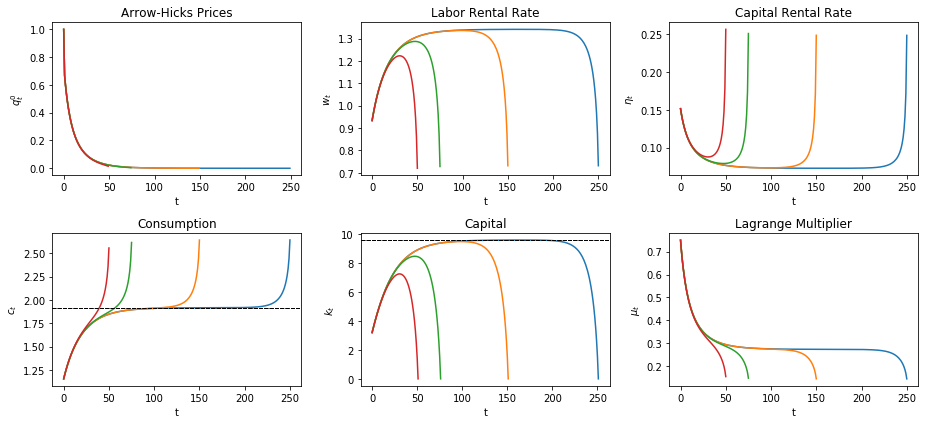

In [15]:
T_list = (250, 150, 75, 50)

fix, axes = plt.subplots(2, 3, figsize=(13, 6))
titles = ['Arrow-Hicks Prices', 'Labor Rental Rate', 'Capital Rental Rate',
          'Consumption', 'Capital', 'Lagrange Multiplier']
ylabels = ['$q_t^0$', '$w_t$', '$\eta_t$', '$c_t$', '$k_t$', '$\mu_t$']

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)

    q = q_func(β, c, γ)
    w = w_func(β, k, α)[:-1]
    η = η_func(A, k, α)[:-1]
    plots = [q, w, η, c, k, μ]

    for ax, plot, title, y in zip(axes.flatten(), plots, titles, ylabels):
        ax.plot(plot)
        ax.set(title=title, ylabel=y, xlabel='t')
        if title is 'Capital':
            ax.axhline(k_ss, lw=1, ls='--', c='k')
        if title is 'Consumption':
            ax.axhline(c_ss, lw=1, ls='--', c='k')


plt.tight_layout()
plt.show()

#### Varying $ \gamma $

Now we see how our results change if we keep T constant, but allow
the curvature parameter, $ \gamma $ to vary, starting
with $ K_0 $ below the steady state.

We plot the results for $ T=150 $

Converged successfully on iteration 44
Converged successfully on iteration 37
Converged successfully on iteration 37
Converged successfully on iteration 37


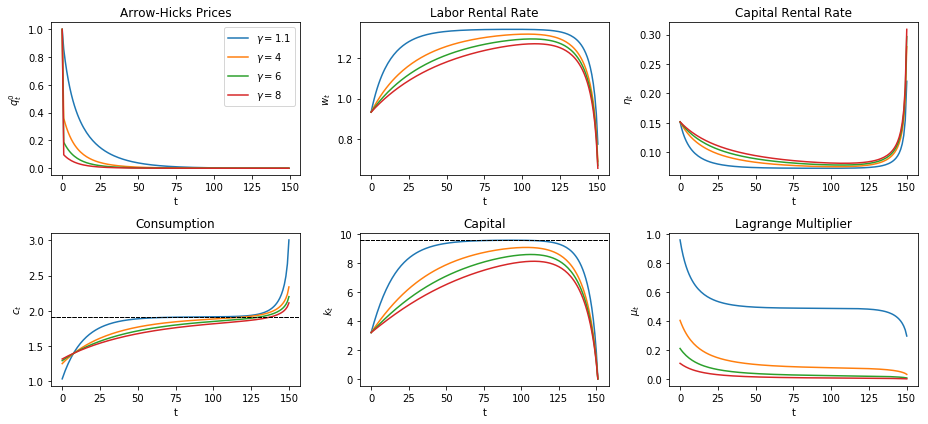

In [16]:
γ_list = (1.1, 4, 6, 8)
T = 150

fix, axes = plt.subplots(2, 3, figsize=(13, 6))

for γ in γ_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)

    q = q_func(β, c, γ)
    w = w_func(β, k, α)[:-1]
    η = η_func(A, k, α)[:-1]
    plots = [q, w, η, c, k, μ]

    for ax, plot, title, y in zip(axes.flatten(), plots, titles, ylabels):
        ax.plot(plot, label=f'$\gamma = {γ}$')
        ax.set(title=title, ylabel=y, xlabel='t')
        if title is 'Capital':
            ax.axhline(k_ss, lw=1, ls='--', c='k')
        if title is 'Consumption':
            ax.axhline(c_ss, lw=1, ls='--', c='k')

axes[0, 0].legend()
plt.tight_layout()
plt.show()

Adjusting $ \gamma $ means adjusting how much individuals prefer
to smooth consumption

Higher $ \gamma $ means individuals prefer to smooth more
resulting in slower adjustments to the steady state allocations

Vice-versa for lower $ \gamma $

### Yield Curves and Hicks-Arrow Prices Again

Now, we compute Hicks-Arrow prices again, but also calculate the
implied the yields to maturity

This will let us plot a **yield curve**

The key formulas are:

The **yield to maturity**

$$
r_{t_0,t}= -\frac{\log q^{t_0}_t}{t}
$$

A generic Hicks-Arrow price for any base-year $ t_0\leq t $

$$
q^{t_0}_t = \beta^{t-t_0} \frac{u'(c_t)}{u'(c_{t_0})}= \beta^{t-t_0}
\frac{c_t^{-\gamma}}{c_{t_0}^{-\gamma}}
$$

We redefine our function for $ q $ to allow arbitrary base
years, and define a new function for $ r $, then plot both

First we plot when $ t_0=0 $ as before, for different values of
$ T $, with $ K_0 $ below the steady state

Converged successfully on iteration 39


Converged successfully on iteration 26
Converged successfully on iteration 25


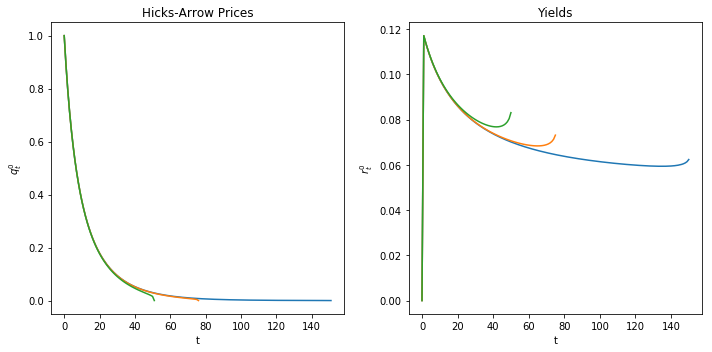

In [17]:
@njit
def q_func(t_0, β, c, γ):
    # Here we choose numeraire to be u'(c_0) -- this is q^(t_0)_t
    T = len(c)
    q = np.zeros(T+1-t_0)
    q[0] = 1
    for t in range(t_0+1, T):
        q[t-t_0] = β**(t - t_0) * u_prime(c[t], γ) / u_prime(c[t_0], γ)
    return q

@njit
def r_func(t_0, β, c, γ):
    '''Yield to maturity'''
    T = len(c) - 1
    r = np.zeros(T+1-t_0)
    for t in range(t_0+1, T+1):
        r[t-t_0]= -np.log(q_func(t_0, β, c, γ)[t-t_0]) / (t - t_0)
    return r

t_0 = 0
T_list = [150, 75, 50]
γ = 2
titles = ['Hicks-Arrow Prices', 'Yields']
ylabels = ['$q_t^0$', '$r_t^0$']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)
    q = q_func(t_0, β, c, γ)
    r = r_func(t_0, β, c, γ)

    for ax, plot, title, y in zip(axes, (q, r), titles, ylabels):
        ax.plot(plot)
        ax.set(title=title, ylabel=y, xlabel='t')

plt.tight_layout()
plt.show()

Now we plot when $ t_0=20 $

Converged successfully on iteration 39


Converged successfully on iteration 26
Converged successfully on iteration 25


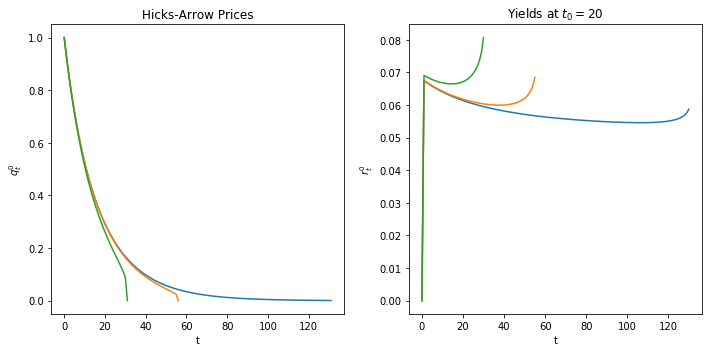

In [18]:
t_0 = 20

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)
    q = q_func(t_0, β, c, γ)
    r = r_func(t_0, β, c, γ)

    for ax, plot, title, y in zip(axes, (q, r), titles, ylabels):
        ax.plot(plot)
        ax.set(title=title, ylabel=y, xlabel='t')

axes[1].set_title(f'Yields at $t_0 = {t_0}$')
plt.tight_layout()
plt.show()

We shall have more to say about the term structure of interest rates
in a later lecture on the topic